In [ ]:
'''
다수결 방법¶
다수결 방법은 가장 단순한 모형 결합 방법으로 전혀 다른 모형도 결합할 수 있다. 다수결 방법은 Hard Voting 과 Soft Voting 두 가지로 나뉘어진다.

hard voting: 단순 투표. 개별 모형의 결과 기준
soft voting: 가중치 투표. 개별 모형의 조건부 확률의 합 기준

모형 결합 방법을 사용하면 일반적으로 계산량은 증가하지만 다음과 같은 효과가 있다.

단일 모형을 사용할 때 보다 성능 분산이 감소하고, 즉 과최적화를 방지한다.
개별 모형이 성능이 안좋을 경우에는 결합 모형의 성능이 더 향상된다.

다수결 방법¶
hard voting: 단순 투표. 개별 모형의 결과 기준
soft voting: 가중치 투표. 개별 모형의 조건부 확률의 합 기준
'''

In [26]:
import pandas as pd 

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [126]:
X_train = pd.read_csv('bi_5_X.csv', delimiter = ',')
Y_train = pd.read_csv('bi_5_Y.csv', delimiter = ',')

In [127]:
X_train = X_train.iloc[:,1:]
Y_train = Y_train.iloc[:,1]
Y_train = pd.factorize(Y_train)[0]

In [128]:
X_train = StandardScaler().fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [129]:
X_train.shape, Y_train.shape

((547192, 48), (547192,))

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X_train , Y_train, test_size=0.1, random_state=42)

In [131]:
x_train.shape, y_train.shape

((492472, 48), (492472,))

# Bagging - GNB

In [145]:
base_estimator = GaussianNB()
#base_estimator =DecisionTreeClassifier(random_state=0, criterion='entropy').fit(x_train, y_train)
estimator = BaggingClassifier(base_estimator=base_estimator, n_estimators=3, bootstrap=True)

estimator.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=3, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [146]:
y_predict = estimator.predict(x_train) 
score = accuracy_score(y_train, y_predict)
print(score) #1.0

y_predict = estimator.predict(x_test) 
score = accuracy_score(y_test, y_predict)
print(score) #1.0

0.8060884679738137
0.8048611111111111


In [142]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_predict))

[[29945     0]
 [10678 14097]]


In [137]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     29945
           1       1.00      0.57      0.73     24775

   micro avg       0.80      0.80      0.80     54720
   macro avg       0.87      0.78      0.79     54720
weighted avg       0.86      0.80      0.79     54720



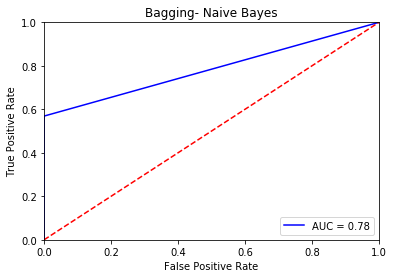

In [139]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Bagging- Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Bagging- Decision tree

In [34]:
base_estimator =DecisionTreeClassifier(random_state=0, criterion='entropy').fit(x_train, y_train)
estimator = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, bootstrap=True)

estimator.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [35]:
y_predict = estimator.predict(x_train) 
score = accuracy_score(y_train, y_predict)
print(score) #1.0

y_predict = estimator.predict(x_test) 
score = accuracy_score(y_test, y_predict)
print(score) #1.0

0.9089173223024306
0.9072465972169417


In [36]:
confusion_matrix(y_predict, y_test)

array([[5957,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 5773,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5982,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5989,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5942,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 6009,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 6080,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6099, 5979,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5876,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 6069]],
      dtype=int64)